# Logistic Regression

We applied **Logistic Regression (LR)** as a linear baseline model to classify tweets as disaster-related or not. The goal was to explore how well LR performs on sparse text data and improve its performance through threshold tuning and regularization adjustments.

`Overview`

Logistic Regression was evaluated as our primary linear baseline classifier for the *Disaster Tweet Classification task*. Multiple models were tested:

* Baseline with CountVectorizer and TF-IDF
* Hyperparameter-tuned model
* Recall-optimized version with class weights
* Custom decision thresholds for recall-precision balancing

The aim was to maximize recall for disaster-related tweets while maintaining acceptable precision.

`Performance Comparison`

<table border="1" cellpadding="5" cellspacing="0">
<tr>
<th>Model Variant</th>
<th>Vectorizer</th>
<th>Accuracy</th>
<th>Precision</th>
<th>Recall</th>
<th>F1-Score</th>
<th>Notes</th>
</tr>

<tr>
<td>Baseline (CountVectorizer)</td>
<td>Count (1,2-grams)</td>
<td>0.802</td>
<td>0.810</td>
<td>0.701</td>
<td>0.751</td>
<td>Balanced performance, higher precision than recall</td>
</tr>

<tr>
<td>Baseline (TF-IDF)</td>
<td>TF-IDF (1,2-grams)</td>
<td>0.803</td>
<td>0.821</td>
<td>0.687</td>
<td>0.748</td>
<td>Slightly higher precision, lowest recall</td>
</tr>

<tr>
<td>Tuned Logistic Regression</td>
<td>Count</td>
<td>0.803</td>
<td>0.810</td>
<td>0.704</td>
<td>0.753</td>
<td>Marginal recall improvement via hyperparameters</td>
</tr>

<tr>
<td>Recall-Optimized Logistic Regression</td>
<td>Count</td>
<td>0.797</td>
<td>0.772</td>
<td>0.744</td>
<td>0.758</td>
<td>Improved recall, small precision drop</td>
</tr>

<tr>
<td>Threshold 0.45</td>
<td>Count</td>
<td>0.790</td>
<td>0.744</td>
<td>0.773</td>
<td>0.758</td>
<td>Good balance – recall ↑ without large precision loss</td>
</tr>

<tr>
<td>Threshold 0.40</td>
<td>Count</td>
<td>0.772</td>
<td>0.704</td>
<td>0.801</td>
<td>0.750</td>
<td>Higher recall, precision drop more noticeable</td>
</tr>

<tr>
<td>Threshold 0.35</td>
<td>Count</td>
<td>0.749</td>
<td>0.668</td>
<td>0.820</td>
<td>0.736</td>
<td>Highest recall, significant precision drop</td>
</tr>
</table>

`Observations`

* Baseline performance was already solid, with ~80% accuracy and balanced precision-recall trade-offs.
* TF-IDF provided slightly better precision but noticeably reduced recall, making it less suitable for disaster detection where recall is critical.
* Hyperparameter tuning yielded only minor improvements over the baseline.
* Recall-optimized model and threshold adjustments successfully improved recall, at the expense of precision.
* Best overall trade-off: Threshold = 0.45, where recall improves to 0.773 without heavy precision loss.
* Max recall: Threshold = 0.35, but precision drops to 0.668, making it less balanced for general deployment.

`Key Takeaways`

* Logistic Regression is a strong, lightweight baseline for text classification here.
* Threshold tuning allows customization for business goals:
  - Higher recall (emergency alert focus) → Lower threshold (0.35–0.4) 
  - Higher precision (minimize false alarms) → Higher threshold (0.45+)
* Despite being a simple linear model, it achieves results competitive with more complex methods.

# Environment & Data

This section covers all the imports like libraries and data.

In [ ]:
# Standard Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

# Models
from sklearn.linear_model import LogisticRegression

# Evaluation Metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, precision_recall_curve


In [27]:
# Custom Imports
import sys, os

PROJECT_ROOT = os.path.abspath(os.path.join(os.getcwd(), '..'))
if PROJECT_ROOT not in sys.path:
    sys.path.insert(0, PROJECT_ROOT)

from src.model_evaluation import logistic_regression, evaluate_model, evaluation_metrics, plot_conf_matrix 

In [28]:
# Data Loading
import pickle

with open('../data/processed/X_train_clean.pkl', 'rb') as f:
    X_train_clean = pickle.load(f)

with open('../data/processed/X_test_clean.pkl', 'rb') as f:
    X_test_clean = pickle.load(f)

with open('../data/processed/y_train.pkl', 'rb') as f:
    y_train = pickle.load(f)

with open('../data/processed/y_test.pkl', 'rb') as f:
    y_test = pickle.load(f)

# Vectorization Comparison

In [29]:
# Initialize CountVectorizer 
count_vectorizer = CountVectorizer(ngram_range=(1, 2))

X_train_cv = count_vectorizer.fit_transform(X_train_clean)
X_test_cv = count_vectorizer.transform(X_test_clean)

===== LogReg with CountVectorizer =====


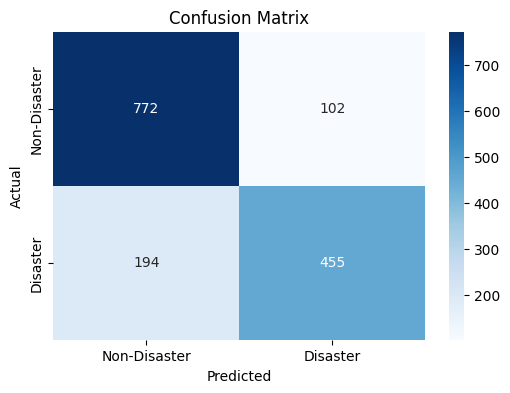

Accuracy: 0.8056467498358503
Precision: 0.8168761220825853
Recall: 0.7010785824345146
F1 Score: 0.7545605306799337


In [30]:
# Evaluate Logistic Regression with CountVectorizer
evaluate_model(logistic_regression(X_train_cv, y_train), X_train_cv, y_train, X_test_cv, y_test, label="LogReg with CountVectorizer")

In [31]:
# Classification report
print(classification_report(y_test, logistic_regression(X_train_cv, y_train).predict(X_test_cv), target_names=['Not Disaster', 'Disaster']))

              precision    recall  f1-score   support

Not Disaster       0.80      0.88      0.84       874
    Disaster       0.82      0.70      0.75       649

    accuracy                           0.81      1523
   macro avg       0.81      0.79      0.80      1523
weighted avg       0.81      0.81      0.80      1523



In [32]:
# TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 2), max_features=10000)

X_train_tfidf = tfidf_vectorizer.fit_transform(X_train_clean)
X_test_tfidf = tfidf_vectorizer.transform(X_test_clean)

===== TF-IDF Vectorizer =====


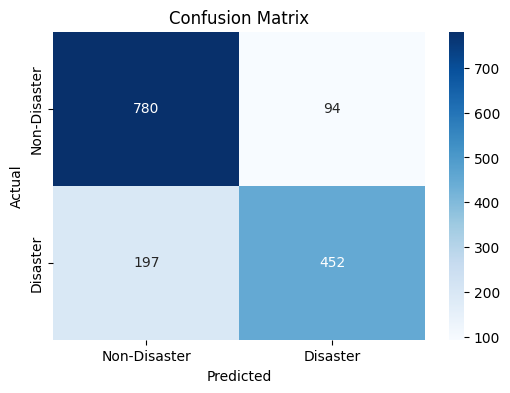

Accuracy: 0.8089297439264609
Precision: 0.8278388278388278
Recall: 0.6964560862865947
F1 Score: 0.7564853556485356


In [33]:
# Evaluate Logistic Regression with TF-IDF Vectorizer
evaluate_model(logistic_regression(X_train_tfidf, y_train), X_train_tfidf, y_train, X_test_tfidf, y_test, label="TF-IDF Vectorizer")

In [34]:
# Classification report
print(classification_report(y_test, logistic_regression(X_train_cv, y_train).predict(X_test_cv), target_names=['Not Disaster', 'Disaster']))

              precision    recall  f1-score   support

Not Disaster       0.80      0.88      0.84       874
    Disaster       0.82      0.70      0.75       649

    accuracy                           0.81      1523
   macro avg       0.81      0.79      0.80      1523
weighted avg       0.81      0.81      0.80      1523



# Baseline Model

We will build the baseline model with vectorized data using Bag of Words (Countvectorizer) as this proved slightly better for Recall.

We use the function for baseline Logistic Regression and evaluate the model with our key metrics:

* Confusion matrix
* Accuracy,  Precision, Recall, F1
* Classification report

In [35]:
# CountVectorizer
X_train_count = count_vectorizer.fit_transform(X_train_clean)
X_test_count = count_vectorizer.transform(X_test_clean)

===== LogReg Baseline =====


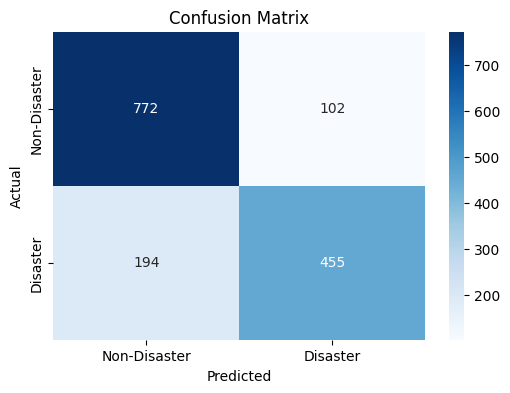

Accuracy: 0.8056467498358503
Precision: 0.8168761220825853
Recall: 0.7010785824345146
F1 Score: 0.7545605306799337


In [36]:
# Evaluate Logistic Regression with CountVectorizer
evaluate_model(logistic_regression(X_train_count, y_train), X_train_count, y_train, X_test_count, y_test, label="LogReg Baseline")

In [37]:
# Classification report
print(classification_report(y_test, logistic_regression(X_train_count, y_train).predict(X_test_count), target_names=['Not Disaster', 'Disaster']))

              precision    recall  f1-score   support

Not Disaster       0.80      0.88      0.84       874
    Disaster       0.82      0.70      0.75       649

    accuracy                           0.81      1523
   macro avg       0.81      0.79      0.80      1523
weighted avg       0.81      0.81      0.80      1523



# Hyperparameter Tuning

We used Grid Search to fined the optimal hyperparameters for Logistic Regression and evaluate the tuned model on the same key evaluation metrics as before, for classification tasks.

In [38]:
# Grid Search
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l2'],  # 'l1' requires solver='liblinear'
    'solver': ['lbfgs', 'saga']
}

grid_search = GridSearchCV(LogisticRegression(max_iter=5000), param_grid, cv=5, scoring='f1', n_jobs=-1)
grid_search.fit(X_train_count, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best F1 Score:", grid_search.best_score_)

Best Parameters: {'C': 1, 'penalty': 'l2', 'solver': 'saga'}
Best F1 Score: 0.7456548087050888


In [39]:
# Evaluate the tuned model
logreg_tuned_model = grid_search.best_estimator_
evaluation_metrics(y_test, logreg_tuned_model.predict(X_test_count))

Evaluation Metrics:
-------------------
Accuracy: 0.8036769533814839
Precision: 0.8158844765342961
Recall: 0.6964560862865947
F1 Score: 0.7514546965918537


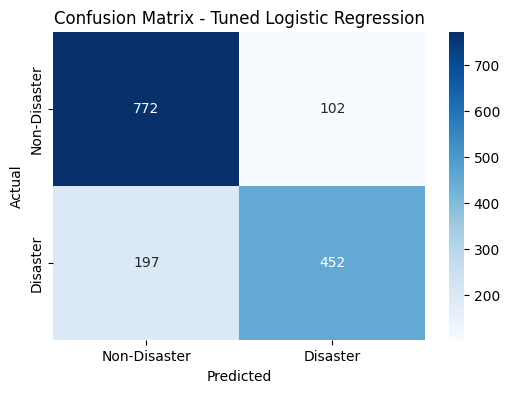

              precision    recall  f1-score   support

Not Disaster       0.80      0.88      0.84       874
    Disaster       0.82      0.70      0.75       649

    accuracy                           0.80      1523
   macro avg       0.81      0.79      0.79      1523
weighted avg       0.80      0.80      0.80      1523



In [40]:
# Evaluate
plot_conf_matrix(y_test, logreg_tuned_model.predict(X_test_count), title="Confusion Matrix - Tuned Logistic Regression")
print(classification_report(y_test, logreg_tuned_model.predict(X_test_count), target_names=['Not Disaster', 'Disaster']))

We will have a quick look at some misclassified tweets before we try to improve upon the tuned model by Grid Search.

In [41]:
preds = logreg_tuned_model.predict(X_test_count)

# Compare predictions with true labels
misclassified_mask = preds != y_test

# Use raw text to display (Pandas Series)
misclassified = X_test_clean[misclassified_mask]
misclassified_true = y_test[misclassified_mask]
misclassified_preds = preds[misclassified_mask]

# Show a few misclassified tweets
for i in range(5):
    print(f"Tweet: {misclassified.iloc[i]}")
    print(f"True label: {misclassified_true.iloc[i]}, Predicted: {misclassified_preds[i]}\n")

Tweet: so you have new weapon that can cause unimaginable destruction
True label: 1, Predicted: 0

Tweet: in response to trauma children of addicts develop defensive self one that decreases vulnerability
True label: 0, Predicted: 1

Tweet: my favorite lady came to our volunteer meeting hopefully joining her youth collision and am excite
True label: 1, Predicted: 0

Tweet: brianroemmele ux fail of emv people want to insert and remove quickly like gas pump stripe reader person told me it crashed the pos
True label: 1, Predicted: 0

Tweet: who is bringing the tornadoes and floods who is bringing the climate change god is after america he is plaguing her farrakhan quote
True label: 0, Predicted: 1



# Improving recall

As predicting disasters can be more important than predicting non-disasters. In this section we explore different techniques to improve recall without sacrificing precision too much.

* Feature engineering with CountVectorizer combined with balanced weights.
* Cross-validation
* Adjusting the probability threshold

### Feature Engineering and Class Weights

Here we will try to improve recall by adding ngram range, excluding rare and overly common terms, and adding class weights.

In [42]:
# Initialize CountVectorizer with additional parameters
vectorizer = CountVectorizer(
    ngram_range=(1, 2),      # Include unigrams and bigrams
    max_df=0.85,             # Exclude overly common terms
    min_df=2,                # Exclude rare terms
    max_features=10000       # Cap feature space size
)

X_train_countv = vectorizer.fit_transform(X_train_clean)
X_test_countv = vectorizer.transform(X_test_clean)

In [43]:
# Logistic Regression with balanced class weights
logreg_balanced_model = LogisticRegression(
    C=1,
    solver='saga',
    penalty='l2',
   class_weight='balanced',  # Boost recall
    max_iter=5000
)

## Cross-Validation

In [44]:
# Cross-validation to evaluate the model
scores = cross_val_score(logreg_balanced_model, X_train_countv, y_train, cv=5, scoring='f1')
print("F1 scores (5-fold):", scores)
print("Mean F1:", scores.mean())

F1 scores (5-fold): [0.7537092  0.72869736 0.75049116 0.71929825 0.743818  ]
Mean F1: 0.7392027922149362


In [45]:
# Fit the model and evaluate
logreg_balanced_model.fit(X_train_countv, y_train)
evaluation_metrics(y_test, logreg_balanced_model.predict(X_test_countv))

Evaluation Metrics:
-------------------
Accuracy: 0.8036769533814839
Precision: 0.780448717948718
Recall: 0.7503852080123267
F1 Score: 0.7651217596229379


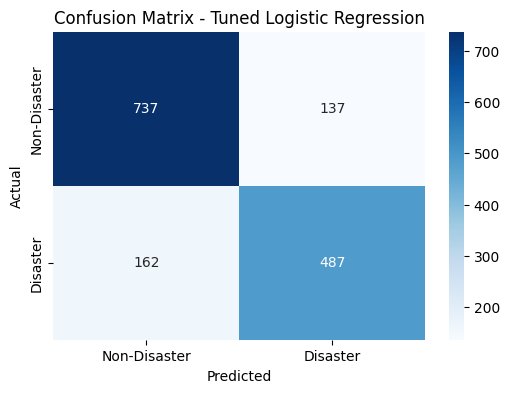

              precision    recall  f1-score   support

Not Disaster       0.82      0.84      0.83       874
    Disaster       0.78      0.75      0.77       649

    accuracy                           0.80      1523
   macro avg       0.80      0.80      0.80      1523
weighted avg       0.80      0.80      0.80      1523



In [46]:
# Evaluate
plot_conf_matrix(y_test, logreg_balanced_model.predict(X_test_countv), title="Confusion Matrix - Tuned Logistic Regression")
print(classification_report(y_test, logreg_balanced_model.predict(X_test_countv), target_names=['Not Disaster', 'Disaster']))

## Adjusting Probability Thresholds

`Precision-Recall Trade-Off (Threshold Tuning)`

Logistic Regression outputs probabilities. By adjusting the threshold used to classify a tweet as a disaster (default = 0.5), we can control the balance between:

- **Precision**: how many predicted disasters were correct
- **Recall**: how many real disasters were detected

We plotted precision and recall scores across all thresholds from 0 to 1.

`Key Insights:`

- Lowering the threshold improves **recall** (fewer missed disasters), but reduces **precision** (more false alarms)
- Raising the threshold improves **precision**, but reduces **recall**
- Around **threshold = 0.45–0.5**, we see the best balance
- For this project, **threshold = 0.4** gave the highest recall (0.74), which may be favorable in disaster detection scenarios.

This tuning technique allows us to adapt the model’s behavior based on real-world priorities.

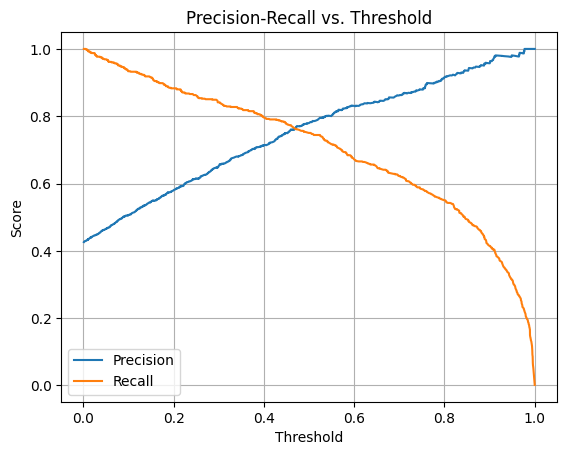

In [47]:
# Get predicted probabilities for class 1 (disaster)
probs = logreg_balanced_model.predict_proba(X_test_countv)[:, 1]
precision, recall, thresholds = precision_recall_curve(y_test, probs)

# Plot Precision-Recall vs Threshold
plt.plot(thresholds, precision[:-1], label="Precision")
plt.plot(thresholds, recall[:-1], label="Recall")
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("Precision-Recall vs. Threshold")
plt.legend()
plt.grid()
plt.show()

In [48]:
# Set custom thresholds to adjust precision and recall
for t in [0.45, 0.35]:
    custom_preds = (probs >= t).astype(int)
    print(f"\nThreshold: {t}")
    evaluation_metrics(y_test, custom_preds)


Threshold: 0.45
Evaluation Metrics:
-------------------
Accuracy: 0.7944845699277742
Precision: 0.75
Recall: 0.7765793528505393
F1 Score: 0.7630582891748675

Threshold: 0.35
Evaluation Metrics:
-------------------
Accuracy: 0.7623112278397899
Precision: 0.6842105263157895
Recall: 0.8212634822804314
F1 Score: 0.7464985994397759


Evaluation Metrics:
-------------------
Accuracy: 0.7767564018384767
Precision: 0.7136929460580913
Recall: 0.7950693374422187
F1 Score: 0.7521865889212828


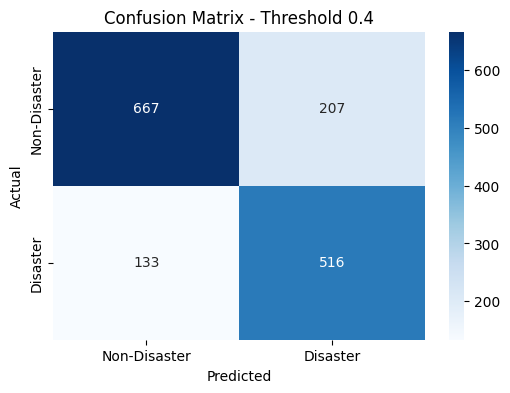

              precision    recall  f1-score   support

Not Disaster       0.83      0.76      0.80       874
    Disaster       0.71      0.80      0.75       649

    accuracy                           0.78      1523
   macro avg       0.77      0.78      0.77      1523
weighted avg       0.78      0.78      0.78      1523



In [49]:
# Change threshold from 0.5 to 0.4
custom_preds = (probs >= 0.4).astype(int)

# Evaluate
evaluation_metrics(y_test, custom_preds)
plot_conf_matrix(y_test, custom_preds, title="Confusion Matrix - Threshold 0.4")
print(classification_report(y_test, custom_preds, target_names=['Not Disaster', 'Disaster']))

Evaluation Metrics:
-------------------
Accuracy: 0.7623112278397899
Precision: 0.6842105263157895
Recall: 0.8212634822804314
F1 Score: 0.7464985994397759


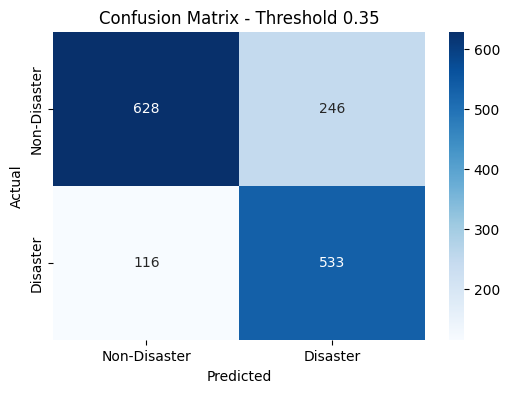

              precision    recall  f1-score   support

Not Disaster       0.84      0.72      0.78       874
    Disaster       0.68      0.82      0.75       649

    accuracy                           0.76      1523
   macro avg       0.76      0.77      0.76      1523
weighted avg       0.78      0.76      0.76      1523



In [50]:
# Change threshold from 0.50 to 0.35
custom_preds = (probs >= 0.35).astype(int)

# Evaluate
evaluation_metrics(y_test, custom_preds)
plot_conf_matrix(y_test, custom_preds, title="Confusion Matrix - Threshold 0.35")
print(classification_report(y_test, custom_preds, target_names=['Not Disaster', 'Disaster']))